# Часть 1: Начальные условия

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df_cls = pd.read_csv('UCI_Credit_Card.csv')
print(f"Размерность данных: {df_cls.shape}")
print(f"Колонки: {df_cls.columns.tolist()}")
print("\nПервые 5 строк:")
df_cls.head()

Размерность данных: (30000, 25)
Колонки: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']

Первые 5 строк:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.00,2,2,1,24,2,2,-1,-1,-2,-2,3913.00,3102.00,689.00,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00,1
1,2,120000.00,2,2,2,26,-1,2,0,0,0,2,2682.00,1725.00,2682.00,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,0,0,29239.00,14027.00,13559.00,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,0,0,46990.00,48233.00,49291.00,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,-1,0,-1,0,0,0,8617.00,5670.00,35835.00,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00,0


In [7]:
print("\n1. Статистическое описание числовых признаков:")
print(df_cls.describe())


1. Статистическое описание числовых признаков:
            ID  LIMIT_BAL      SEX  EDUCATION  MARRIAGE      AGE    PAY_0  \
count 30000.00   30000.00 30000.00   30000.00  30000.00 30000.00 30000.00   
mean  15000.50  167484.32     1.60       1.85      1.55    35.49    -0.02   
std    8660.40  129747.66     0.49       0.79      0.52     9.22     1.12   
min       1.00   10000.00     1.00       0.00      0.00    21.00    -2.00   
25%    7500.75   50000.00     1.00       1.00      1.00    28.00    -1.00   
50%   15000.50  140000.00     2.00       2.00      2.00    34.00     0.00   
75%   22500.25  240000.00     2.00       2.00      2.00    41.00     0.00   
max   30000.00 1000000.00     2.00       6.00      3.00    79.00     8.00   

         PAY_2    PAY_3    PAY_4    PAY_5    PAY_6  BILL_AMT1  BILL_AMT2  \
count 30000.00 30000.00 30000.00 30000.00 30000.00   30000.00   30000.00   
mean     -0.13    -0.17    -0.22    -0.27    -0.29   51223.33   49179.08   
std       1.20     1.20     1.

In [8]:
print("\n2. Распределение целевой переменной:")
target_dist = df_cls['default.payment.next.month'].value_counts()
print(f"Не дефолт (0): {target_dist[0]} ({target_dist[0]/len(df_cls)*100:.1f}%)")
print(f"Дефолт (1): {target_dist[1]} ({target_dist[1]/len(df_cls)*100:.1f}%)")


2. Распределение целевой переменной:
Не дефолт (0): 23364 (77.9%)
Дефолт (1): 6636 (22.1%)


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

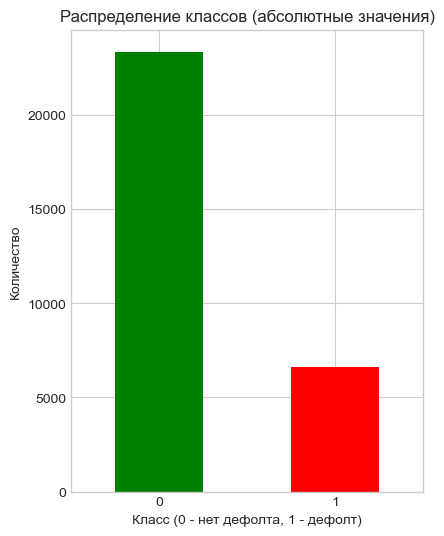

In [9]:
# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
target_dist.plot(kind='bar', color=['green', 'red'])
plt.title('Распределение классов (абсолютные значения)')
plt.xlabel('Класс (0 - нет дефолта, 1 - дефолт)')
plt.ylabel('Количество')
plt.xticks(rotation=0)

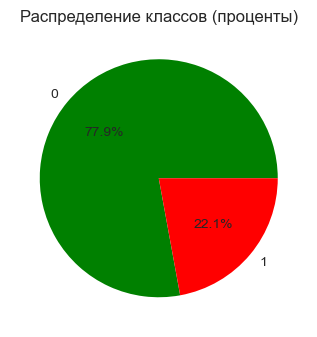

In [10]:
plt.subplot(1, 2, 2)
target_dist.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Распределение классов (проценты)')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [11]:
# Загрузка данных для регрессии
df_reg = pd.read_csv('AirQuality.csv', sep=';', decimal=',')
print("=== ДАННЫЕ ДЛЯ РЕГРЕССИИ ===")
print(f"Размерность данных: {df_reg.shape}")
print(f"Колонки: {df_reg.columns.tolist()}")

=== ДАННЫЕ ДЛЯ РЕГРЕССИИ ===
Размерность данных: (9471, 17)
Колонки: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


In [12]:
# Удаление ненужных колонок
df_reg = df_reg.loc[:, ~df_reg.columns.str.contains('^Unnamed')]

In [13]:
# Преобразование числовых колонок
numeric_columns = df_reg.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
    df_reg[col] = pd.to_numeric(df_reg[col], errors='coerce')

In [14]:
# Замена -200 (пропущенные значения) на NaN
df_reg.replace(-200, np.nan, inplace=True)

In [15]:
# Удаление строк с пропусками в целевой переменной
df_reg = df_reg[df_reg['CO(GT)'].notna()]

In [16]:
print(f"\nРазмерность после очистки: {df_reg.shape}")
print("\nПервые 5 строк:")
df_reg.head()


Размерность после очистки: (7674, 15)

Первые 5 строк:


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.60,1360.00,150.00,11.90,1046.00,166.00,1056.00,113.00,1692.00,1268.00,13.60,48.90,0.76
1,10/03/2004,19.00.00,2.00,1292.00,112.00,9.40,955.00,103.00,1174.00,92.00,1559.00,972.00,13.30,47.70,0.73
2,10/03/2004,20.00.00,2.20,1402.00,88.00,9.00,939.00,131.00,1140.00,114.00,1555.00,1074.00,11.90,54.00,0.75
3,10/03/2004,21.00.00,2.20,1376.00,80.00,9.20,948.00,172.00,1092.00,122.00,1584.00,1203.00,11.00,60.00,0.79
4,10/03/2004,22.00.00,1.60,1272.00,51.00,6.50,836.00,131.00,1205.00,116.00,1490.00,1110.00,11.20,59.60,0.79


In [17]:
# Анализ данных
print("\n1. Базовая информация:")
print(df_reg.info())


1. Базовая информация:
<class 'pandas.core.frame.DataFrame'>
Index: 7674 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7674 non-null   object 
 1   Time           7674 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    7344 non-null   float64
 4   NMHC(GT)       890 non-null    float64
 5   C6H6(GT)       7344 non-null   float64
 6   PT08.S2(NMHC)  7344 non-null   float64
 7   NOx(GT)        7261 non-null   float64
 8   PT08.S3(NOx)   7344 non-null   float64
 9   NO2(GT)        7258 non-null   float64
 10  PT08.S4(NO2)   7344 non-null   float64
 11  PT08.S5(O3)    7344 non-null   float64
 12  T              7344 non-null   float64
 13  RH             7344 non-null   float64
 14  AH             7344 non-null   float64
dtypes: float64(13), object(2)
memory usage: 959.2+ KB
None


In [18]:
print("\n2. Статистическое описание целевой переменной CO(GT):")
print(df_reg['CO(GT)'].describe())


2. Статистическое описание целевой переменной CO(GT):
count   7674.00
mean       2.15
std        1.45
min        0.10
25%        1.10
50%        1.80
75%        2.90
max       11.90
Name: CO(GT), dtype: float64


In [19]:
print("\n3. Количество пропущенных значений по колонкам:")
print(df_reg.isnull().sum())


3. Количество пропущенных значений по колонкам:
Date                0
Time                0
CO(GT)              0
PT08.S1(CO)       330
NMHC(GT)         6784
C6H6(GT)          330
PT08.S2(NMHC)     330
NOx(GT)           413
PT08.S3(NOx)      330
NO2(GT)           416
PT08.S4(NO2)      330
PT08.S5(O3)       330
T                 330
RH                330
AH                330
dtype: int64


Text(0, 0.5, 'Частота')

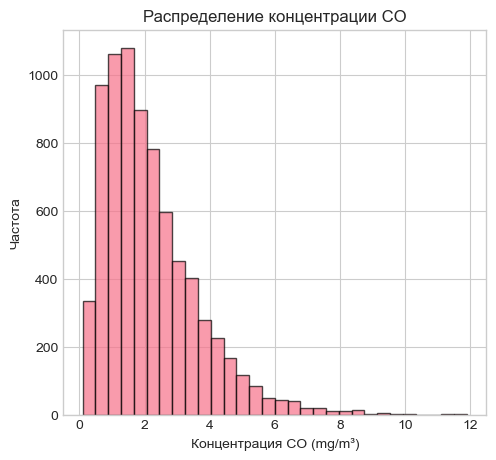

In [20]:
# Визуализация распределения целевой переменной
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_reg['CO(GT)'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение концентрации CO')
plt.xlabel('Концентрация CO (mg/m³)')
plt.ylabel('Частота')

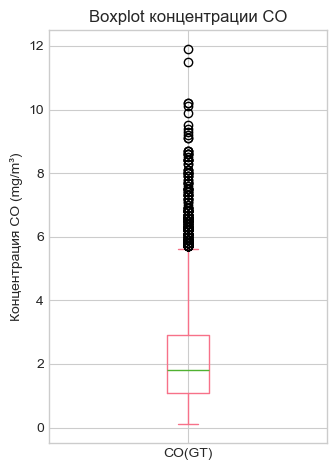

In [21]:
plt.subplot(1, 2, 2)
df_reg['CO(GT)'].dropna().plot(kind='box')
plt.title('Boxplot концентрации CO')
plt.ylabel('Концентрация CO (mg/m³)')
plt.tight_layout()
plt.show()

# Часть 2: Создание бейзлайна и оценка качества

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2.1 Бейзлайн для задачи классификации

In [ ]:
# Подготовка данных для классификации
X_cls = df_cls.drop('default.payment.next.month', axis=1)
y_cls = df_cls['default.payment.next.month']

In [ ]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

print(f"Размер train выборки: {X_train_cls.shape}")
print(f"Размер test выборки: {X_test_cls.shape}")

In [ ]:
categorical_cls = X_cls.select_dtypes(include=['object']).columns.tolist()
numerical_cls = X_cls.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nКатегориальные признаки: {categorical_cls}")
print(f"Числовые признаки: {len(numerical_cls)}")

In [ ]:
# Создание препроцессора
preprocessor_cls = ColumnTransformer([
    ('num', StandardScaler(), numerical_cls),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cls)
])

In [24]:
# Модели для классификации
models_cls = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(random_state=42)
}

NameError: name 'LogisticRegression' is not defined

In [ ]:
# Обучение и оценка моделей
results_cls = {}

for name, model in models_cls.items():
    print(f"\n{'='*50}")
    print(f"Модель: {name}")
    print('='*50)
    
    # Создание пайплайна
    pipe = Pipeline([
        ('prep', preprocessor_cls),
        ('model', model)
    ])
    
    # Обучение
    pipe.fit(X_train_cls, y_train_cls)
    
    # Предсказания
    y_pred = pipe.predict(X_test_cls)
    
    # Метрики
    accuracy = accuracy_score(y_test_cls, y_pred)
    precision = precision_score(y_test_cls, y_pred, zero_division=0)
    recall = recall_score(y_test_cls, y_pred, zero_division=0)
    f1 = f1_score(y_test_cls, y_pred, zero_division=0)
    
    # ROC-AUC (только для вероятностных моделей)
    if hasattr(pipe.named_steps['model'], 'predict_proba'):
        y_proba = pipe.predict_proba(X_test_cls)[:, 1]
        roc_auc = roc_auc_score(y_test_cls, y_proba)
    else:
        roc_auc = None
    
    results_cls[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': roc_auc
    }
    
    # Вывод метрик
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    
    cm = confusion_matrix(y_test_cls, y_pred)
    print("\nМатрица ошибок:")
    print(cm)
    
    print("\nОтчет классификации:")
    print(classification_report(y_test_cls, y_pred, target_names=['No Default', 'Default']))


In [ ]:
# Визуализация результатов классификации
results_cls_df = pd.DataFrame(results_cls).T
print("\nСводная таблица результатов классификации:")
print(results_cls_df.round(4))

In [ ]:
# График сравнения метрик
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    if metric in results_cls_df.columns:
        results_cls_df[metric].plot(kind='bar', ax=ax, color=['blue', 'orange', 'green'])
        ax.set_title(f'{metric} по моделям')
        ax.set_ylabel(metric)
        ax.set_xlabel('Модель')
        ax.tick_params(axis='x', rotation=45)

In [ ]:
# Удаление пустого subplot если метрик нечетное количество
if len(metrics) < 6:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

### 2.2 Бейзлайн для задачи регрессии

In [ ]:
# Подготовка данных для классификации
X_cls = df_cls.drop('default.payment.next.month', axis=1)
y_cls = df_cls['default.payment.next.month']

In [ ]:
# Разделение на train/test
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

print(f"Размер train выборки: {X_train_cls.shape}")
print(f"Размер test выборки: {X_test_cls.shape}")

In [ ]:
# Определение типов признаков
categorical_cls = X_cls.select_dtypes(include=['object']).columns.tolist()
numerical_cls = X_cls.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nКатегориальные признаки: {categorical_cls}")
print(f"Числовые признаки: {len(numerical_cls)}")

In [ ]:
# Создание препроцессора
preprocessor_cls = ColumnTransformer([
    ('num', StandardScaler(), numerical_cls),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cls)
])